# CAPSTONE CODE

#### 1) Import Data
#### 2) Pre-Processing Data
#### 3) EDA

#### 4) LSTM AE Model Build

## IMPORT DATA

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# raw_data = pd.read_csv('C:/Users/Michael/Desktop/Capstone/all_detailed_sorted.csv', sep = ',')
raw_data = pd.read_csv('/Users/mitchellcarmen/Documents/DATA SCIENCE/MScA/Capstone/all_detailed_sorted.csv', sep = ',') 

In [3]:
raw_data.shape

(1481835, 27)

In [4]:
raw_data.head(50)

,SYSTEM_ID,MODELID,RULESET_NAME,DATE_GMT,HOUR_GMT,WORKLOAD_NAME,USERID,CLIENTADDRESS,PROGRAMNAME,ACCOUNTSTRING,...,TOTAL_EXEC_COUNT,ARRIVAL_RATE,TOTAL_CPU_TIME,CPU_UTIL_PCT,TOTAL_IO_OPS,NBR_PHYS_BLK_READS,NBR_PHYS_BLKWRITES,TOTAL_DELAY_TIME,CONCURRENCY_LIMIT_VALUE,CPUUTIL_PCT_LIMIT_VALUE
0,1,1526610,1,02-JAN-16,0,Load,INFETLPRD,30.128.140.73,TPUMPEXE,$M2$&D&HLOAD,...,132,0.036667,8.626456,1.645768e-06,0.000000e+00,0,0,0.0,-1.0,1
1,1,1526610,1,02-JAN-16,0,EDWARDLOAD,EDW_V20_CS90_MBR_DML,30.128.128.22,BTEQ,$M2$&D&HLOAD,...,2,0.000556,0.047936,9.145244e-09,0.000000e+00,0,0,0.0,-1.0,1
2,1,1526610,1,02-JAN-16,0,EDWARDLOAD,EDW_V20_CS90_MBR_DML,30.128.128.22,BTEQ,$M2$&D&HLOAD,...,2,0.000556,14.758761,2.815698e-06,5.614010e+04,21223,3021,0.0,10.0,1
3,1,1526610,1,02-JAN-16,0,EDWARDLOAD,EDW_V20_CS90_MBR_DML,30.128.128.22,BTEQ,$M2$&D&HLOAD,...,2,0.000556,0.057529,1.100000e-08,0.000000e+00,0,0,0.0,-1.0,1
4,1,1526610,1,02-JAN-16,0,CIIOUT-WEBAPP,SRCCIIPRDWS,30.128.97.133,WIREPORTSERVER,$M1$&D&HCIIOUT,...,1,0.000278,0.019186,3.660378e-09,0.000000e+00,0,0,0.0,-1.0,1
5,1,1526610,1,02-JAN-16,0,EDWARDLOAD,EDW_V20_CS90_MBR_DML,30.128.128.22,BTEQ,$M2$&D&HLOAD,...,6,0.001667,0.062281,1.188198e-08,1.157814e+01,5,0,0.0,-1.0,1
6,1,1526610,1,02-JAN-16,0,Load,DX_EDW_ALL_WEBMD_DML,30.130.19.213,BTEQ,$M2$&D&HLOAD,...,1,0.000278,0.004782,9.122438e-10,0.000000e+00,0,0,0.0,-1.0,1
7,1,1526610,1,02-JAN-16,0,Load,SSB_SNRRSK_CMS_MEDCR_DML,30.128.132.138,BTEQ,$M2$&D&HLOAD,...,2,0.000556,5.886709,1.123075e-06,4.647467e+03,1757,250,0.0,10.0,1
8,1,1526610,1,02-JAN-16,0,Load,EDW_CHUB_MBR_DML,30.128.128.22,BTEQ,$M2$&D&HLOAD,...,6,0.001667,0.134214,2.560554e-08,4.631257e+00,2,0,0.0,-1.0,1
9,1,1526610,1,02-JAN-16,0,Load,EDW_CHUB_MBR_DML,30.128.128.22,BTEQ,$M2$&D&HLOAD,...,2,0.000556,0.062310,1.188768e-08,0.000000e+00,0,0,0.0,-1.0,1


In [5]:
raw_data.tail()

,SYSTEM_ID,MODELID,RULESET_NAME,DATE_GMT,HOUR_GMT,WORKLOAD_NAME,USERID,CLIENTADDRESS,PROGRAMNAME,ACCOUNTSTRING,...,TOTAL_EXEC_COUNT,ARRIVAL_RATE,TOTAL_CPU_TIME,CPU_UTIL_PCT,TOTAL_IO_OPS,NBR_PHYS_BLK_READS,NBR_PHYS_BLKWRITES,TOTAL_DELAY_TIME,CONCURRENCY_LIMIT_VALUE,CPUUTIL_PCT_LIMIT_VALUE
1481830,1,1549235,161,20-JAN-16,23,DEVLPR,AD83516,30.130.16.130,QUERYMAN,$M2$&D&HDEVLPR,...,1,0.000278,0.039138,7.466888e-09,0.000000,0,0,0.0,-1.0,1
1481831,1,1549235,161,20-JAN-16,23,USER,AC98202,208.78.177.104,SQLA,$M1$&D&HUSER,...,3,0.000833,0.426699,8.140616e-08,0.000000,0,0,0.0,-1.0,1
1481832,1,1549235,161,20-JAN-16,23,MedicaidLd,SSB_WGS_CLM_DML,30.128.128.22,BTEQ,$M2$&D&HLOAD,...,2,0.000556,0.060918,1.162206e-08,0.000000,0,0,0.0,-1.0,1
1481833,1,1549235,161,20-JAN-16,23,EDWOthLd,PYMNT_INNVTN_SS_DML,30.128.128.22,BTEQ,$M2$&D&HLOADVIP,...,12,0.003333,0.117442,2.240584e-08,12.945731,6,0,0.0,-1.0,1
1481834,1,1549235,161,20-JAN-16,23,DEVLPR,AC98927,30.138.145.211,SQLA,$M2$&D&HDEVLPR,...,1,0.000278,0.039138,7.466888e-09,0.000000,0,0,0.0,-1.0,1


In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1481835 entries, 0 to 1481834
Data columns (total 27 columns):
SYSTEM_ID                    1481835 non-null int64
MODELID                      1481835 non-null int64
RULESET_NAME                 1481835 non-null int64
DATE_GMT                     1481835 non-null object
HOUR_GMT                     1481835 non-null int64
WORKLOAD_NAME                1481835 non-null object
USERID                       1481835 non-null object
CLIENTADDRESS                1481835 non-null object
PROGRAMNAME                  1481835 non-null object
ACCOUNTSTRING                1481835 non-null object
EXTERNALWORKLOADNAME         1154139 non-null object
AVGPRIORITY                  1481835 non-null float64
AVG_NBR_PARALLEL_SESSIONS    1481835 non-null float64
AVG_REQUEST_PARALLELISM      1481835 non-null float64
NBR_INTERCONNECT_MSGS        1481835 non-null int64
NBR_INTERCONNECT_BLKS        1481835 non-null int64
TOTAL_RESP_TIME              1481835 non-n

## PRE-PROCESSING

### DROP FIELDS WE DONT NEED: Only keep dependent variables

In [7]:
# Print all columns names
print(list(raw_data.columns))

['SYSTEM_ID', 'MODELID', 'RULESET_NAME', 'DATE_GMT', 'HOUR_GMT', 'WORKLOAD_NAME', 'USERID', 'CLIENTADDRESS', 'PROGRAMNAME', 'ACCOUNTSTRING', 'EXTERNALWORKLOADNAME', 'AVGPRIORITY', 'AVG_NBR_PARALLEL_SESSIONS', 'AVG_REQUEST_PARALLELISM', 'NBR_INTERCONNECT_MSGS', 'NBR_INTERCONNECT_BLKS', 'TOTAL_RESP_TIME', 'TOTAL_EXEC_COUNT', 'ARRIVAL_RATE', 'TOTAL_CPU_TIME', 'CPU_UTIL_PCT', 'TOTAL_IO_OPS', 'NBR_PHYS_BLK_READS', 'NBR_PHYS_BLKWRITES', 'TOTAL_DELAY_TIME', 'CONCURRENCY_LIMIT_VALUE', 'CPUUTIL_PCT_LIMIT_VALUE']


In [8]:
good_fields = ['DATE_GMT','HOUR_GMT','WORKLOAD_NAME','TOTAL_EXEC_COUNT','TOTAL_CPU_TIME','CPU_UTIL_PCT','TOTAL_IO_OPS']
data = raw_data[good_fields]

In [9]:
data.shape

(1481835, 7)

In [10]:
data.head(20)

,DATE_GMT,HOUR_GMT,WORKLOAD_NAME,TOTAL_EXEC_COUNT,TOTAL_CPU_TIME,CPU_UTIL_PCT,TOTAL_IO_OPS
0,02-JAN-16,0,Load,132,8.626456,1.645768e-06,0.000000e+00
1,02-JAN-16,0,EDWARDLOAD,2,0.047936,9.145244e-09,0.000000e+00
2,02-JAN-16,0,EDWARDLOAD,2,14.758761,2.815698e-06,5.614010e+04
3,02-JAN-16,0,EDWARDLOAD,2,0.057529,1.100000e-08,0.000000e+00
4,02-JAN-16,0,CIIOUT-WEBAPP,1,0.019186,3.660378e-09,0.000000e+00
5,02-JAN-16,0,EDWARDLOAD,6,0.062281,1.188198e-08,1.157814e+01
6,02-JAN-16,0,Load,1,0.004782,9.122438e-10,0.000000e+00
7,02-JAN-16,0,Load,2,5.886709,1.123075e-06,4.647467e+03
8,02-JAN-16,0,Load,6,0.134214,2.560554e-08,4.631257e+00
9,02-JAN-16,0,Load,2,0.062310,1.188768e-08,0.000000e+00


### Fix variable types, missing values, data/time...

In [11]:
# Create categories for WORKLOADs
data['WORKLOAD_NAME'] = data['WORKLOAD_NAME'].astype('category')
data.info()

/Users/mitchellcarmen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1481835 entries, 0 to 1481834
Data columns (total 7 columns):
DATE_GMT            1481835 non-null object
HOUR_GMT            1481835 non-null int64
WORKLOAD_NAME       1481835 non-null category
TOTAL_EXEC_COUNT    1481835 non-null int64
TOTAL_CPU_TIME      1481835 non-null float64
CPU_UTIL_PCT        1481835 non-null float64
TOTAL_IO_OPS        1481835 non-null float64
dtypes: category(1), float64(3), int64(2), object(1)
memory usage: 69.2+ MB


In [12]:
# Missing Values = NONE! Yay.
print(data.isnull().sum())

DATE_GMT            0
HOUR_GMT            0
WORKLOAD_NAME       0
TOTAL_EXEC_COUNT    0
TOTAL_CPU_TIME      0
CPU_UTIL_PCT        0
TOTAL_IO_OPS        0
dtype: int64


In [13]:
# Fix DATE & TIME
from datetime import timedelta
from datetime import *

In [14]:
data['DATE_TIME'] = pd.to_datetime(data['DATE_GMT'].astype(str) +' '+data['HOUR_GMT'].astype(str), format = '%d-%b-%y %H')
data.head()

/Users/mitchellcarmen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,DATE_GMT,HOUR_GMT,WORKLOAD_NAME,TOTAL_EXEC_COUNT,TOTAL_CPU_TIME,CPU_UTIL_PCT,TOTAL_IO_OPS,DATE_TIME
0,02-JAN-16,0,Load,132,8.626456,1.645768e-06,0.00000,2016-01-02
1,02-JAN-16,0,EDWARDLOAD,2,0.047936,9.145244e-09,0.00000,2016-01-02
2,02-JAN-16,0,EDWARDLOAD,2,14.758761,2.815698e-06,56140.10011,2016-01-02
3,02-JAN-16,0,EDWARDLOAD,2,0.057529,1.100000e-08,0.00000,2016-01-02
4,02-JAN-16,0,CIIOUT-WEBAPP,1,0.019186,3.660378e-09,0.00000,2016-01-02


In [15]:
data = data.drop(columns = ['DATE_GMT','HOUR_GMT'])
data = data[['DATE_TIME','WORKLOAD_NAME','TOTAL_EXEC_COUNT','TOTAL_CPU_TIME','CPU_UTIL_PCT','TOTAL_IO_OPS']]

In [16]:
data.head()

,DATE_TIME,WORKLOAD_NAME,TOTAL_EXEC_COUNT,TOTAL_CPU_TIME,CPU_UTIL_PCT,TOTAL_IO_OPS
0,2016-01-02,Load,132,8.626456,1.645768e-06,0.00000
1,2016-01-02,EDWARDLOAD,2,0.047936,9.145244e-09,0.00000
2,2016-01-02,EDWARDLOAD,2,14.758761,2.815698e-06,56140.10011
3,2016-01-02,EDWARDLOAD,2,0.057529,1.100000e-08,0.00000
4,2016-01-02,CIIOUT-WEBAPP,1,0.019186,3.660378e-09,0.00000


## EDA

In [17]:
# What are the highest frequency counts of WORKLOADS?
data['WORKLOAD_NAME'].value_counts(dropna=False).head(66) # showing only the head

EDWOthLd          309664
Load              190283
USER              174273
LOAD              158342
EDWARDLOAD        118472
DEVLPR             94461
DBA                91616
CIIOUT-WEBAPP      54708
CLMLd              29585
MbrshpLd           26827
Other Activity     20218
DATAEXCHG          19343
OUTOther           17766
MedicaidLd         13129
OUT                12411
RIA                11464
CISLd              10989
CIIOUT-BATCH       10242
PROVLd              9764
MCPLd               9662
STARLd              9000
PRC                 8913
COALd               8707
PharmLd             8624
3rdPTYLd            8280
Unknown             7722
SYS_STATS           7102
PRODLd              6730
HR                  6331
RDSLd               3536
                   ...  
EDMLd               1474
APPL                1083
CAPNLd              1041
EDWHstLd             897
HELPDESK             659
CIILd                558
CIIld                558
CIS                  542
APPLDEV              334


## WE NEED SEPARATE DATAFRAMES FOR EACH WORK LOAD TIME SERIES. Let's work with EdwardLoad first as it has many observations.

#### EDWARDLOAD WORKLOAD

In [18]:
df = data[data.WORKLOAD_NAME == 'EDWOthLd']
df.head(10)

,DATE_TIME,WORKLOAD_NAME,TOTAL_EXEC_COUNT,TOTAL_CPU_TIME,CPU_UTIL_PCT,TOTAL_IO_OPS
728,2016-01-02,EDWOthLd,2,12.071342,2.303000e-06,1.021887e+04
729,2016-01-02,EDWOthLd,1,2.784904,5.313079e-07,2.537929e+03
732,2016-01-02,EDWOthLd,3,2802.406833,5.346472e-04,9.645265e+05
733,2016-01-02,EDWOthLd,8,11.977085,2.285000e-06,1.068663e+04
737,2016-01-02,EDWOthLd,93,3166.335666,6.040781e-04,6.312140e+06
740,2016-01-02,EDWOthLd,5,0.182150,3.475079e-08,4.631257e+00
741,2016-01-02,EDWOthLd,22,2239.775233,4.273075e-04,4.305495e+05
742,2016-01-02,EDWOthLd,26,68.201642,1.301161e-05,3.018422e+04
743,2016-01-02,EDWOthLd,2,0.038343,7.315055e-09,0.000000e+00
745,2016-01-02,EDWOthLd,34,69.070402,1.317735e-05,8.376323e+04


In [19]:
df.tail(10)

,DATE_TIME,WORKLOAD_NAME,TOTAL_EXEC_COUNT,TOTAL_CPU_TIME,CPU_UTIL_PCT,TOTAL_IO_OPS
1481799,2016-01-20 23:00:00,EDWOthLd,19,34.110901,6.507727e-06,41217.049439
1481800,2016-01-20 23:00:00,EDWOthLd,2,0.091350,1.742791e-08,28.049084
1481808,2016-01-20 23:00:00,EDWOthLd,9,148.185272,2.827100e-05,249084.492249
1481813,2016-01-20 23:00:00,EDWOthLd,2,0.052212,1.000000e-08,0.000000
1481815,2016-01-20 23:00:00,EDWOthLd,2,0.021753,4.149996e-09,0.000000
1481818,2016-01-20 23:00:00,EDWOthLd,11,0.004340,8.279294e-10,0.000000
1481825,2016-01-20 23:00:00,EDWOthLd,1,1.480317,2.824171e-07,422.893875
1481827,2016-01-20 23:00:00,EDWOthLd,21,0.217526,4.149996e-08,0.000000
1481829,2016-01-20 23:00:00,EDWOthLd,2,0.056551,1.078895e-08,0.000000
1481833,2016-01-20 23:00:00,EDWOthLd,12,0.117442,2.240584e-08,12.945731


In [20]:
df.shape

(309664, 6)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 309664 entries, 728 to 1481833
Data columns (total 6 columns):
DATE_TIME           309664 non-null datetime64[ns]
WORKLOAD_NAME       309664 non-null category
TOTAL_EXEC_COUNT    309664 non-null int64
TOTAL_CPU_TIME      309664 non-null float64
CPU_UTIL_PCT        309664 non-null float64
TOTAL_IO_OPS        309664 non-null float64
dtypes: category(1), datetime64[ns](1), float64(3), int64(1)
memory usage: 14.5 MB


In [22]:
df.describe()

,TOTAL_EXEC_COUNT,TOTAL_CPU_TIME,CPU_UTIL_PCT,TOTAL_IO_OPS
count,3.096640e+05,3.096640e+05,3.096640e+05,3.096640e+05
mean,2.572624e+02,1.399104e+03,2.669231e-04,1.353259e+06
std,1.178025e+04,1.262676e+04,2.408952e-03,1.329212e+07
min,1.000000e+00,9.975766e-05,1.903191e-11,0.000000e+00
25%,2.000000e+00,6.589360e-02,1.257128e-08,0.000000e+00
50%,4.000000e+00,2.009376e+00,3.833517e-07,5.903199e+02
75%,1.100000e+01,1.367568e+02,2.609066e-05,1.871840e+05
max,2.276686e+06,1.090649e+06,2.080756e-01,1.420852e+09


### Let's aggregate the EDWOthLd WL down to averages by day/hour

In [23]:
df.head(50)

,DATE_TIME,WORKLOAD_NAME,TOTAL_EXEC_COUNT,TOTAL_CPU_TIME,CPU_UTIL_PCT,TOTAL_IO_OPS
728,2016-01-02,EDWOthLd,2,12.071342,2.303000e-06,1.021887e+04
729,2016-01-02,EDWOthLd,1,2.784904,5.313079e-07,2.537929e+03
732,2016-01-02,EDWOthLd,3,2802.406833,5.346472e-04,9.645265e+05
733,2016-01-02,EDWOthLd,8,11.977085,2.285000e-06,1.068663e+04
737,2016-01-02,EDWOthLd,93,3166.335666,6.040781e-04,6.312140e+06
740,2016-01-02,EDWOthLd,5,0.182150,3.475079e-08,4.631257e+00
741,2016-01-02,EDWOthLd,22,2239.775233,4.273075e-04,4.305495e+05
742,2016-01-02,EDWOthLd,26,68.201642,1.301161e-05,3.018422e+04
743,2016-01-02,EDWOthLd,2,0.038343,7.315055e-09,0.000000e+00
745,2016-01-02,EDWOthLd,34,69.070402,1.317735e-05,8.376323e+04


In [24]:
# VERSION 1: Let's look at EDWOthLd by the correct aggregation
df_grouped = df.groupby(['DATE_TIME']).mean()
df_grouped.columns = ['AVG_EXEC_COUNT','AVG_CPU_TIME','AVG_CPU_UTIL','AVG_IO_OPS']
df_grouped.head(30)

,AVG_EXEC_COUNT,AVG_CPU_TIME,AVG_CPU_UTIL,AVG_IO_OPS
DATE_TIME,,,,
2016-01-02 00:00:00,888.157480,635.068047,0.000121,5.676721e+05
2016-01-02 01:00:00,892.357937,1573.456138,0.000300,2.155748e+06
2016-01-02 02:00:00,432.300501,1929.271206,0.000368,1.844556e+06
2016-01-02 03:00:00,382.474409,1894.740471,0.000361,2.956156e+06
2016-01-02 04:00:00,166.388193,294.295163,0.000056,3.822958e+05
2016-01-02 05:00:00,427.629596,435.236522,0.000083,3.653723e+05
2016-01-02 06:00:00,225.610197,419.210743,0.000080,2.283159e+05
2016-01-02 07:00:00,209.338235,604.453404,0.000115,3.986077e+05
2016-01-02 08:00:00,513.027273,734.751157,0.000140,8.380717e+05


In [25]:
# VERSION 2: Let's look at EDWARDLOAD by the correct aggregation
df_PIVOT = df.pivot_table(index=["DATE_TIME"],
                                            values=["TOTAL_EXEC_COUNT","TOTAL_CPU_TIME","CPU_UTIL_PCT","TOTAL_IO_OPS"],
                                            aggfunc=np.mean)
df_PIVOT.columns = ['AVG_CPU_UTIL','AVG_CPU_TIME','AVG_EXEC_COUNT','AVG_IO_OPS']
df_PIVOT.head(30)

,AVG_CPU_UTIL,AVG_CPU_TIME,AVG_EXEC_COUNT,AVG_IO_OPS
DATE_TIME,,,,
2016-01-02 00:00:00,0.000121,635.068047,888.157480,5.676721e+05
2016-01-02 01:00:00,0.000300,1573.456138,892.357937,2.155748e+06
2016-01-02 02:00:00,0.000368,1929.271206,432.300501,1.844556e+06
2016-01-02 03:00:00,0.000361,1894.740471,382.474409,2.956156e+06
2016-01-02 04:00:00,0.000056,294.295163,166.388193,3.822958e+05
2016-01-02 05:00:00,0.000083,435.236522,427.629596,3.653723e+05
2016-01-02 06:00:00,0.000080,419.210743,225.610197,2.283159e+05
2016-01-02 07:00:00,0.000115,604.453404,209.338235,3.986077e+05
2016-01-02 08:00:00,0.000140,734.751157,513.027273,8.380717e+05


In [26]:
df_PIVOT.shape

(321, 4)

In [27]:
# We need to rest the index as indeces are lost as variables afterg the pivot/groupBy
df_PIVOT = df_PIVOT.reset_index()
df_PIVOT.head(30)

,DATE_TIME,AVG_CPU_UTIL,AVG_CPU_TIME,AVG_EXEC_COUNT,AVG_IO_OPS
0,2016-01-02 00:00:00,0.000121,635.068047,888.157480,5.676721e+05
1,2016-01-02 01:00:00,0.000300,1573.456138,892.357937,2.155748e+06
2,2016-01-02 02:00:00,0.000368,1929.271206,432.300501,1.844556e+06
3,2016-01-02 03:00:00,0.000361,1894.740471,382.474409,2.956156e+06
4,2016-01-02 04:00:00,0.000056,294.295163,166.388193,3.822958e+05
5,2016-01-02 05:00:00,0.000083,435.236522,427.629596,3.653723e+05
6,2016-01-02 06:00:00,0.000080,419.210743,225.610197,2.283159e+05
7,2016-01-02 07:00:00,0.000115,604.453404,209.338235,3.986077e+05
8,2016-01-02 08:00:00,0.000140,734.751157,513.027273,8.380717e+05
9,2016-01-02 09:00:00,0.000120,628.414349,33.714072,7.325231e+05


### PLOT COMPARISONS OF TOTAL vs AVG

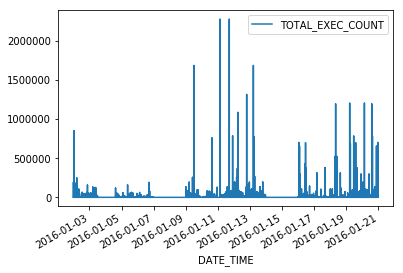

In [28]:
# RAW EXECUTED
y_col = 'TOTAL_EXEC_COUNT'
df.plot(x='DATE_TIME', y=y_col)

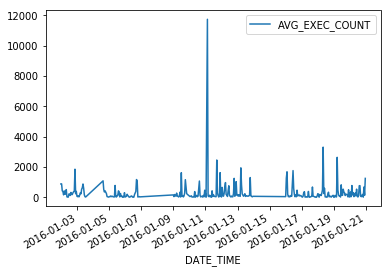

In [29]:
# AGGREGATED EXECUTED
y_col = 'AVG_EXEC_COUNT'
df_PIVOT.plot(x='DATE_TIME', y=y_col)

In [30]:
df_PIVOT.AVG_EXEC_COUNT.head()

0    888.157480
1    892.357937
2    432.300501
3    382.474409
4    166.388193
Name: AVG_EXEC_COUNT, dtype: float64

In [31]:
mva = df_PIVOT.AVG_EXEC_COUNT.rolling(window=2).mean()
mva.head()

0           NaN
1    890.257709
2    662.329219
3    407.387455
4    274.431301
Name: AVG_EXEC_COUNT, dtype: float64

In [32]:
mva[1:]

1       890.257709
2       662.329219
3       407.387455
4       274.431301
5       297.008894
6       326.619896
7       217.474216
8       361.182754
9       273.370672
10       27.364045
11       19.639860
12      121.873436
13      223.591379
14      175.520754
15      226.835345
16      255.996673
17      187.236218
18      246.153157
19      338.813162
20      379.774026
21     1122.614354
22     1048.686817
23      316.969497
24      231.767420
25       58.102988
26       70.400096
27       63.662203
28       87.093157
29      218.708581
30      267.379738
          ...     
291     207.533602
292     165.796187
293     193.163158
294     105.815995
295     268.491403
296     264.862328
297      29.869455
298     193.804519
299     203.031942
300     415.245495
301     471.967866
302     237.178750
303     178.960920
304      65.434073
305     186.908605
306     198.060658
307     324.147406
308     308.605224
309      51.051886
310      71.027467
311     441.525787
312     770.

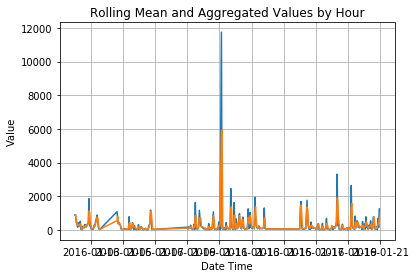

In [33]:
# ROLLING MEAN
y_col = mva
y_col2 = df_PIVOT.AVG_EXEC_COUNT
x_col = df_PIVOT.DATE_TIME
fig, ax = plt.subplots()
ax.plot(x_col, y_col2)
ax.plot(x_col, y_col)
ax.set(xlabel='Date Time', ylabel='Value',
       title='Rolling Mean and Aggregated Values by Hour')
ax.grid()

In [34]:
diffs = df_PIVOT.AVG_EXEC_COUNT[1:] - mva[1:]
diffs.mean()

0.5679787269236204

In [35]:
diffs.head(200)

1        2.100228
2     -230.028718
3      -24.913046
4     -108.043108
5      130.620701
6     -101.009699
7       -8.135981
8      151.844519
9     -239.656600
10      -6.350027
11      -1.374159
12     103.607736
13      -1.889792
14     -46.180833
15      97.495424
16     -68.334096
17      -0.426359
18      59.343297
19      33.316708
20       7.644156
21     735.196172
22    -809.123710
23      77.406390
24    -162.608466
25     -11.055966
26      23.353074
27     -30.090968
28      53.521922
29      78.093502
30     -29.422345
          ...    
171    -21.742796
172     29.330391
173    -25.448396
174      2.482003
175    103.546532
176    502.522022
177   -588.325870
178    298.702853
179    181.817544
180   -449.126377
181     22.089728
182    -52.275747
183     46.068299
184    -31.812954
185    -19.144643
186    938.431662
187   -570.123431
188   -287.862537
189    -39.503762
190    -37.829454
191     27.814993
192     54.899754
193    -89.895893
194     22.637788
195     -1

### Other plots of Raw vs Aggregated

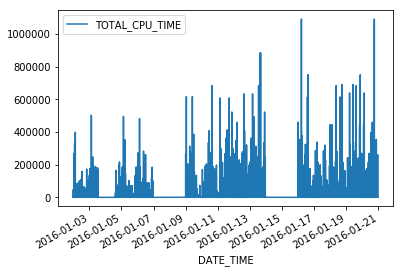

In [36]:
# RAW CPU TIME
y_col = 'TOTAL_CPU_TIME'
df.plot(x='DATE_TIME', y=y_col)

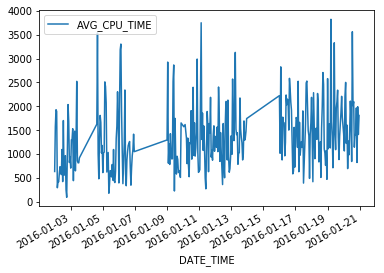

In [37]:
# AGGREGATED CPU TIME
y_col = 'AVG_CPU_TIME'
df_PIVOT.plot(x='DATE_TIME', y=y_col)

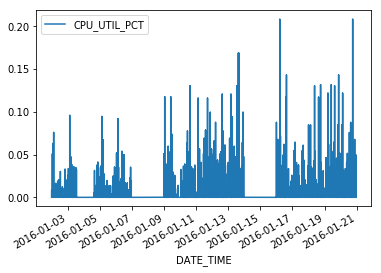

In [38]:
# RAW CPU UTIL
y_col = 'CPU_UTIL_PCT'
df.plot(x='DATE_TIME', y=y_col)

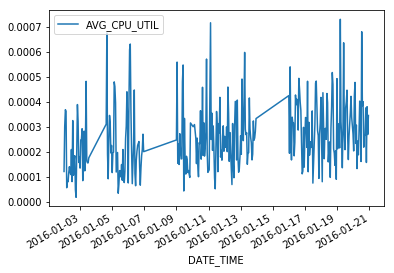

In [39]:
# AGGREGATED CPU UTIL
y_col = 'AVG_CPU_UTIL'
df_PIVOT.plot(x='DATE_TIME', y=y_col)

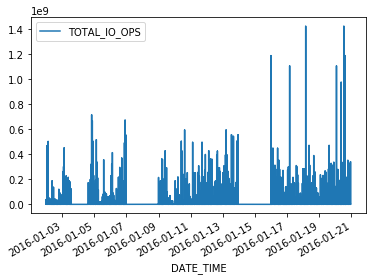

In [40]:
# RAW IO
y_col = 'TOTAL_IO_OPS'
df.plot(x='DATE_TIME', y=y_col)

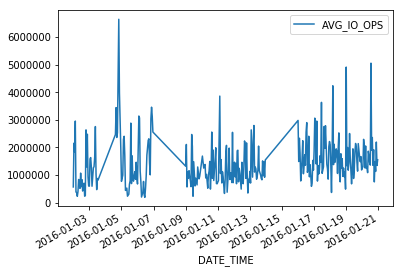

In [41]:
# AGGREGATED IO
y_col = 'AVG_IO_OPS'
df_PIVOT.plot(x='DATE_TIME', y=y_col)

# LSTM AUTOENCODER Models

In [42]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from numpy import array
from keras.models import Sequential
from keras.models import Model
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.utils import plot_model
import tensorflow as tf
import seaborn as sns

Using TensorFlow backend.


In [43]:
df_PIVOT.head()

,DATE_TIME,AVG_CPU_UTIL,AVG_CPU_TIME,AVG_EXEC_COUNT,AVG_IO_OPS
0,2016-01-02 00:00:00,0.000121,635.068047,888.157480,5.676721e+05
1,2016-01-02 01:00:00,0.000300,1573.456138,892.357937,2.155748e+06
2,2016-01-02 02:00:00,0.000368,1929.271206,432.300501,1.844556e+06
3,2016-01-02 03:00:00,0.000361,1894.740471,382.474409,2.956156e+06
4,2016-01-02 04:00:00,0.000056,294.295163,166.388193,3.822958e+05


In [44]:
data_avg_cpu_util = df_PIVOT.drop(['DATE_TIME','AVG_CPU_TIME','AVG_EXEC_COUNT','AVG_IO_OPS'], axis=1)

In [45]:
data_avg_cpu_util['scaled'] = StandardScaler().fit_transform(data_avg_cpu_util['AVG_CPU_UTIL'].values.reshape(-1,1))

In [46]:
data_avg_cpu_util.describe()

,AVG_CPU_UTIL,scaled
count,321.000000,3.210000e+02
mean,0.000260,4.046607e-17
std,0.000131,1.001561e+00
min,0.000018,-1.853864e+00
25%,0.000167,-7.103615e-01
50%,0.000244,-1.186967e-01
75%,0.000323,4.849437e-01
max,0.000729,3.596577e+00


In [47]:
sample_data = data_avg_cpu_util.scaled

### Using https://machinelearningmastery.com/lstm-autoencoders/ as a framework.

In [48]:
# reshape input into samples, timesteps, features
from numpy import array
#sequence = data_avg_cpu_util.scaled
sequence = sample_data
n_in = len(sequence)
sequence = np.array(sequence).reshape((1, n_in, 1))
print(n_in)
print(sequence.shape)

321
(1, 321, 1)


In [49]:
sample_data[:100]

0    -1.062623
1     0.308634
2     0.828583
3     0.778123
4    -1.560590
5    -1.354634
6    -1.378052
7    -1.107359
8    -0.916957
9    -1.072345
10   -1.157571
11   -0.389700
12   -1.372370
13    0.496604
14   -1.176546
15   -0.755324
16   -0.581122
17   -1.626962
18   -1.853864
19   -0.445242
20    0.986289
21    0.472496
22   -0.787302
23   -0.626155
24   -0.958956
25   -0.094568
26   -0.075238
27    0.246269
28   -1.343801
29   -0.011089
        ...   
70   -1.413838
71    1.000987
72    2.666184
73    2.838850
74    0.807907
75   -0.440326
76   -1.435736
77   -0.208611
78    1.432447
79   -1.130084
80   -1.498846
81   -0.719387
82   -0.445239
83   -0.263017
84   -0.145219
85   -0.916521
86   -1.481419
87   -0.945025
88   -0.572859
89   -0.389474
90    0.079629
91   -0.455486
92   -0.097723
93    2.286456
94   -0.809465
95   -0.219016
96   -0.847919
97    0.094029
98   -0.417529
99   -0.678000
Name: scaled, Length: 100, dtype: float64

In [50]:
# define model
model = Sequential()
model.add(LSTM(32, activation = 'relu', input_shape=(n_in,1)))
model.add(RepeatVector(n_in))
model.add(LSTM(32, activation = 'relu', return_sequences = True))
model.add(TimeDistributed(Dense(1)))
model.compile(optimizer='adam', loss = 'mse')

In [ ]:
# fit model
model.fit(sequence, sequence, epochs=50, verbose=1)

Epoch 1/50


In [55]:
# get the feature vector for the input sequence
yhat = model.predict(sequence)
print(yhat.shape)
print(yhat[0,:,0])

(1, 100, 1)
[-0.19185491 -0.31476396 -0.40556437 -0.46950197 -0.5116595  -0.5368318
 -0.549342   -0.5527999  -0.54996246 -0.5429272  -0.5333229  -0.521879
 -0.50931364 -0.49638876 -0.4836353  -0.47141165 -0.45991617 -0.44919991
 -0.43935367 -0.4304077  -0.42236358 -0.41519523 -0.40885654 -0.40328777
 -0.3983925  -0.39412558 -0.3904365  -0.38727048 -0.38457185 -0.38228637
 -0.3803627  -0.37875342 -0.37741524 -0.37630928 -0.37540102 -0.37466007
 -0.3740599  -0.37357736 -0.37319273 -0.37288904 -0.3726518  -0.37246883
 -0.37232986 -0.3722263  -0.37215096 -0.372098   -0.3720625  -0.37204057
 -0.3720289  -0.37202495 -0.37202665 -0.37203234 -0.37204072 -0.3720508
 -0.3720618  -0.37207317 -0.37208447 -0.37209544 -0.37210578 -0.37211552
 -0.37212446 -0.37213257 -0.37213993 -0.37214646 -0.37215227 -0.37215737
 -0.37216187 -0.3721657  -0.37216908 -0.37217194 -0.3721744  -0.3721765
 -0.3721783  -0.37217975 -0.372181   -0.37218207 -0.3721829  -0.37218365
 -0.37218422 -0.3721847  -0.37218505 -0.3721

In [56]:
reconstruction_error = sample_data - yhat[0,:,0]

In [57]:
reconstruction_error

0    -0.870768
1     0.623398
2     1.234147
3     1.247625
4    -1.048931
5    -0.817802
6    -0.828711
7    -0.554559
8    -0.366994
9    -0.529418
10   -0.624248
11    0.132179
12   -0.863056
13    0.992993
14   -0.692910
15   -0.283912
16   -0.121206
17   -1.177762
18   -1.414511
19   -0.014835
20    1.408652
21    0.887691
22   -0.378445
23   -0.222867
24   -0.560563
25    0.299557
26    0.315199
27    0.633540
28   -0.959229
29    0.371197
        ...   
70   -1.041664
71    1.373164
72    3.038362
73    3.211030
74    1.180088
75   -0.068144
76   -1.063553
77    0.163573
78    1.804631
79   -0.757900
80   -1.126661
81   -0.347202
82   -0.073054
83    0.109169
84    0.226967
85   -0.544335
86   -1.109233
87   -0.572839
88   -0.200673
89   -0.017288
90    0.451815
91   -0.083300
92    0.274463
93    2.658643
94   -0.437279
95    0.153171
96   -0.475732
97    0.466215
98   -0.045343
99   -0.305814
Name: scaled, Length: 100, dtype: float64

### Plot the actual, predictions, and the reconstruction error

In [66]:
reconstruct_dat = pd.DataFrame()
reconstruct_dat['sample_data'] = sample_data
reconstruct_dat['predictions'] = yhat[0,:,0]
reconstruct_dat['reconstruct_error'] = reconstruction_error
reconstruct_dat.head(50)

,sample_data,predictions,reconstruct_error
0,-1.062623,-0.191855,-0.870768
1,0.308634,-0.314764,0.623398
2,0.828583,-0.405564,1.234147
3,0.778123,-0.469502,1.247625
4,-1.560590,-0.511660,-1.048931
5,-1.354634,-0.536832,-0.817802
6,-1.378052,-0.549342,-0.828711
7,-1.107359,-0.552800,-0.554559
8,-0.916957,-0.549962,-0.366994
9,-1.072345,-0.542927,-0.529418


In [81]:
reconstruct_dat.tail(50)

,sample_data,predictions,reconstruct_error
50,1.680247,-0.372027,2.052273
51,1.537182,-0.372032,1.909214
52,1.034181,-0.372041,1.406222
53,-1.079431,-0.372051,-0.707381
54,-0.481014,-0.372062,-0.108952
55,-1.728452,-0.372073,-1.356379
56,-1.451421,-0.372084,-1.079336
57,-1.035451,-0.372095,-0.663356
58,-1.045982,-0.372106,-0.673876
59,-1.228516,-0.372116,-0.856401


In [67]:
np.mean(reconstruct_dat.reconstruct_error)

0.07197411634592545

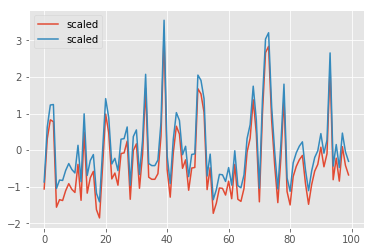

In [79]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')
plt.plot(sample_data)
#plt.plot(yhat[0,:,0])
plt.plot(reconstruction_error)
plt.legend(loc='upper left')

plt.show()

In [1]:
### MIGHT NEED TO USE SUMS INSTEAD OF AVG'S

### Zia

RMSE: 1.014


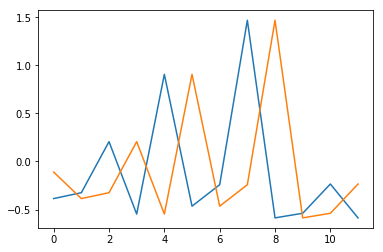

In [55]:
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from math import sqrt
from matplotlib import pyplot
# load dataset
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')
series = data_avg_cpu_util['scaled']
# split data into train and test
X = series.values
train, test = X[0:-12], X[-12:]
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
	# make prediction
	predictions.append(history[-1])
	# observation
	history.append(test[i])
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)
# line plot of observed vs predicted
pyplot.plot(test)
pyplot.plot(predictions)
pyplot.show()

In [56]:
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from pandas import concat

# frame a sequence as a supervised learning problem
def timeseries_to_supervised(data, lag=1):
    df = DataFrame(data)
    columns = [df.shift(i) for i in range(1, lag+1)]
    columns.append(df)
    df = concat(columns, axis=1)
    df.fillna(0, inplace=True)
    return df

# load dataset
series = data_avg_cpu_util['scaled']
# transform to supervised learning
X = series.values
supervised = timeseries_to_supervised(X, 1)
print(supervised.head())

          0         0
0  0.000000  0.044254
1  0.044254 -0.192245
2 -0.192245 -0.360683
3 -0.360683 -0.269090
4 -0.269090 -0.495219


In [57]:
from pandas import read_csv
from pandas import datetime
from pandas import Series
from sklearn.preprocessing import MinMaxScaler
# load dataset
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
series = data_avg_cpu_util['scaled']
print(series.head())
# transform scale
X = series.values
X = X.reshape(len(X), 1)
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler = scaler.fit(X)
scaled_X = scaler.transform(X)
scaled_series = Series(scaled_X[:, 0])
print(scaled_series.head())
# invert transform
inverted_X = scaler.inverse_transform(scaled_X)
inverted_series = Series(inverted_X[:, 0])
print(inverted_series.head())

0    0.044254
1   -0.192245
2   -0.360683
3   -0.269090
4   -0.495219
Name: scaled, dtype: float64
0   -0.840944
1   -0.892686
2   -0.929538
3   -0.909499
4   -0.958973
dtype: float64
0    0.044254
1   -0.192245
2   -0.360683
3   -0.269090
4   -0.495219
dtype: float64


In [58]:
X, y = train, test
X = X.reshape(X.shape[0], 1, X.shape[1])

IndexError: tuple index out of range

### Skouras

In [59]:
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

### Data

In [60]:
df_PIVOT.head()

,DATE_TIME,AVG_CPU_UTIL,AVG_CPU_TIME,AVG_EXEC_COUNT,AVG_IO_OPS
0,2016-01-02 00:00:00,0.000234,1227.465476,29.605536,1.403489e+06
1,2016-01-02 01:00:00,0.000162,849.243304,76.548287,2.575598e+06
2,2016-01-02 02:00:00,0.000111,579.867546,34.446387,7.194693e+05
3,2016-01-02 03:00:00,0.000139,726.349061,183.689189,2.041642e+06
4,2016-01-02 04:00:00,0.000070,364.709884,12.345277,5.624170e+05


In [61]:
data_avg_cpu_util = df_PIVOT.drop(['DATE_TIME','AVG_CPU_TIME','AVG_EXEC_COUNT','AVG_IO_OPS'], axis=1)

In [62]:
data_avg_cpu_util.head()

,AVG_CPU_UTIL
0,0.000234
1,0.000162
2,0.000111
3,0.000139
4,0.000070


In [63]:
sample_data = data_avg_cpu_util

# Georgios - LSTM MODEL 1

In [64]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(sample_data)

In [66]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

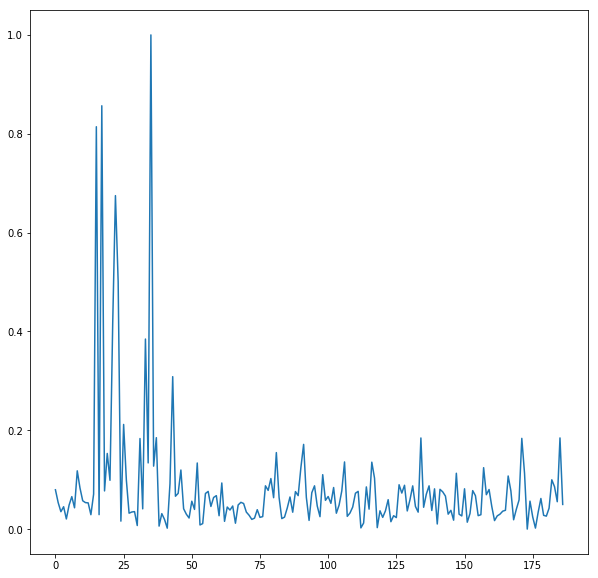

In [94]:
plt.figure(figsize=(10,10))
plt.plot(train)

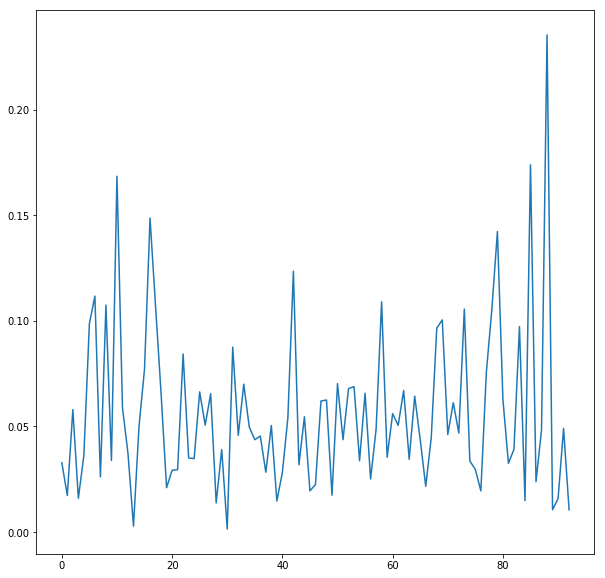

In [93]:
plt.figure(figsize=(10,10))
plt.plot(test)

In [69]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [70]:
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [75]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [77]:
# create and fit the LSTM network
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
for i in range(1000):
	model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
	model.reset_states()

Epoch 1/1
 - 2s - loss: 0.0162
Epoch 1/1
 - 1s - loss: 0.0163
Epoch 1/1
 - 1s - loss: 0.0163
Epoch 1/1
 - 0s - loss: 0.0163
Epoch 1/1
 - 0s - loss: 0.0163
Epoch 1/1
 - 1s - loss: 0.0163
Epoch 1/1
 - 1s - loss: 0.0163
Epoch 1/1
 - 0s - loss: 0.0163
Epoch 1/1
 - 1s - loss: 0.0163
Epoch 1/1
 - 1s - loss: 0.0162
Epoch 1/1
 - 1s - loss: 0.0162
Epoch 1/1
 - 1s - loss: 0.0162
Epoch 1/1
 - 0s - loss: 0.0162
Epoch 1/1
 - 0s - loss: 0.0162
Epoch 1/1
 - 0s - loss: 0.0162
Epoch 1/1
 - 0s - loss: 0.0162
Epoch 1/1
 - 0s - loss: 0.0161
Epoch 1/1
 - 0s - loss: 0.0161
Epoch 1/1
 - 0s - loss: 0.0161
Epoch 1/1
 - 0s - loss: 0.0161
Epoch 1/1
 - 0s - loss: 0.0161
Epoch 1/1
 - 0s - loss: 0.0161
Epoch 1/1
 - 0s - loss: 0.0161
Epoch 1/1
 - 1s - loss: 0.0161
Epoch 1/1
 - 0s - loss: 0.0160
Epoch 1/1
 - 0s - loss: 0.0160
Epoch 1/1
 - 0s - loss: 0.0160
Epoch 1/1
 - 0s - loss: 0.0160
Epoch 1/1
 - 0s - loss: 0.0160
Epoch 1/1
 - 0s - loss: 0.0160
Epoch 1/1
 - 1s - loss: 0.0160
Epoch 1/1
 - 0s - loss: 0.0160
Epoch 1/

 - 1s - loss: 0.0133
Epoch 1/1
 - 1s - loss: 0.0132
Epoch 1/1
 - 1s - loss: 0.0132
Epoch 1/1
 - 1s - loss: 0.0132
Epoch 1/1
 - 1s - loss: 0.0132
Epoch 1/1
 - 1s - loss: 0.0131
Epoch 1/1
 - 1s - loss: 0.0131
Epoch 1/1
 - 1s - loss: 0.0131
Epoch 1/1
 - 1s - loss: 0.0131
Epoch 1/1
 - 1s - loss: 0.0130
Epoch 1/1
 - 1s - loss: 0.0130
Epoch 1/1
 - 1s - loss: 0.0130
Epoch 1/1
 - 1s - loss: 0.0129
Epoch 1/1
 - 1s - loss: 0.0129
Epoch 1/1
 - 1s - loss: 0.0129
Epoch 1/1
 - 1s - loss: 0.0128
Epoch 1/1
 - 1s - loss: 0.0128
Epoch 1/1
 - 1s - loss: 0.0128
Epoch 1/1
 - 1s - loss: 0.0128
Epoch 1/1
 - 1s - loss: 0.0127
Epoch 1/1
 - 1s - loss: 0.0127
Epoch 1/1
 - 1s - loss: 0.0127
Epoch 1/1
 - 1s - loss: 0.0127
Epoch 1/1
 - 1s - loss: 0.0126
Epoch 1/1
 - 1s - loss: 0.0126
Epoch 1/1
 - 1s - loss: 0.0126
Epoch 1/1
 - 1s - loss: 0.0125
Epoch 1/1
 - 1s - loss: 0.0125
Epoch 1/1
 - 1s - loss: 0.0125
Epoch 1/1
 - 1s - loss: 0.0125
Epoch 1/1
 - 1s - loss: 0.0124
Epoch 1/1
 - 1s - loss: 0.0124
Epoch 1/1
 - 1s - 

Epoch 1/1
 - 1s - loss: 0.0072
Epoch 1/1
 - 1s - loss: 0.0072
Epoch 1/1
 - 1s - loss: 0.0072
Epoch 1/1
 - 1s - loss: 0.0072
Epoch 1/1
 - 1s - loss: 0.0072
Epoch 1/1
 - 1s - loss: 0.0072
Epoch 1/1
 - 1s - loss: 0.0071
Epoch 1/1
 - 1s - loss: 0.0071
Epoch 1/1
 - 1s - loss: 0.0071
Epoch 1/1
 - 1s - loss: 0.0071
Epoch 1/1
 - 1s - loss: 0.0071
Epoch 1/1
 - 1s - loss: 0.0071
Epoch 1/1
 - 1s - loss: 0.0071
Epoch 1/1
 - 1s - loss: 0.0071
Epoch 1/1
 - 1s - loss: 0.0071
Epoch 1/1
 - 1s - loss: 0.0071
Epoch 1/1
 - 1s - loss: 0.0071
Epoch 1/1
 - 1s - loss: 0.0071
Epoch 1/1
 - 1s - loss: 0.0071
Epoch 1/1
 - 1s - loss: 0.0071
Epoch 1/1
 - 1s - loss: 0.0071
Epoch 1/1
 - 1s - loss: 0.0070
Epoch 1/1
 - 1s - loss: 0.0070
Epoch 1/1
 - 1s - loss: 0.0070
Epoch 1/1
 - 1s - loss: 0.0070
Epoch 1/1
 - 1s - loss: 0.0070
Epoch 1/1
 - 1s - loss: 0.0070
Epoch 1/1
 - 1s - loss: 0.0070
Epoch 1/1
 - 1s - loss: 0.0070
Epoch 1/1
 - 1s - loss: 0.0070
Epoch 1/1
 - 1s - loss: 0.0070
Epoch 1/1
 - 1s - loss: 0.0070
Epoch 1/

 - 0s - loss: 0.0067
Epoch 1/1
 - 0s - loss: 0.0065
Epoch 1/1
 - 0s - loss: 0.0067
Epoch 1/1
 - 0s - loss: 0.0064
Epoch 1/1
 - 0s - loss: 0.0065
Epoch 1/1
 - 0s - loss: 0.0063
Epoch 1/1
 - 0s - loss: 0.0064
Epoch 1/1
 - 0s - loss: 0.0064
Epoch 1/1
 - 0s - loss: 0.0064
Epoch 1/1
 - 0s - loss: 0.0064
Epoch 1/1
 - 1s - loss: 0.0064
Epoch 1/1
 - 1s - loss: 0.0064
Epoch 1/1
 - 1s - loss: 0.0063
Epoch 1/1
 - 1s - loss: 0.0064
Epoch 1/1
 - 1s - loss: 0.0063
Epoch 1/1
 - 1s - loss: 0.0065
Epoch 1/1
 - 0s - loss: 0.0063
Epoch 1/1
 - 1s - loss: 0.0099
Epoch 1/1
 - 1s - loss: 0.0074
Epoch 1/1
 - 1s - loss: 0.0152
Epoch 1/1
 - 0s - loss: 0.0068
Epoch 1/1
 - 0s - loss: 0.0060
Epoch 1/1
 - 1s - loss: 0.0059
Epoch 1/1
 - 1s - loss: 0.0058
Epoch 1/1
 - 1s - loss: 0.0058
Epoch 1/1
 - 1s - loss: 0.0058
Epoch 1/1
 - 1s - loss: 0.0059
Epoch 1/1
 - 1s - loss: 0.0059
Epoch 1/1
 - 1s - loss: 0.0059
Epoch 1/1
 - 1s - loss: 0.0059
Epoch 1/1
 - 1s - loss: 0.0059
Epoch 1/1
 - 1s - loss: 0.0059
Epoch 1/1
 - 1s - 

In [78]:
# make predictions
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)

In [79]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [80]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.00 RMSE
Test Score: 0.00 RMSE


In [81]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [82]:
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

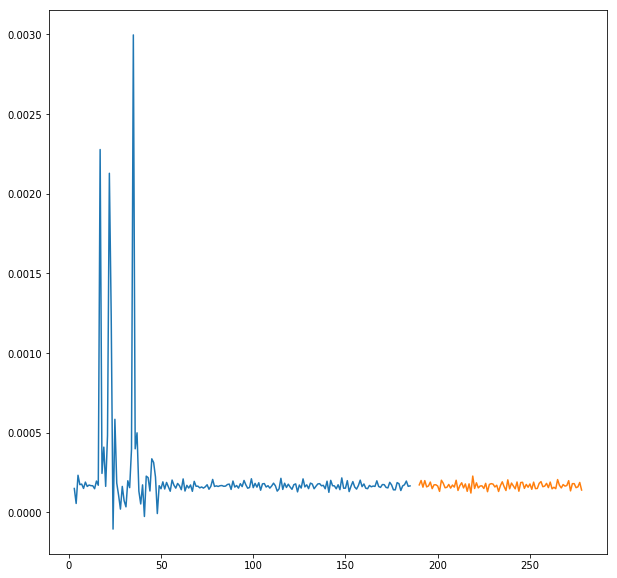

In [92]:
# plot baseline and predictions
plt.figure(figsize=(10,10))
#plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()